In [2]:
%run setup.ipynb

In [3]:
fine_base, fine_baseinfo = load_function("fine_base.tar")
fine_base.eval()
base, baseinfo = load_function("base_lr0.0005.tar")
base.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
def plt_lss(title, info, ax, ylim_top=0.5, ylim_bot=0, xlim_top=11, xlim_bot=0):
    train = info["train_loss"]
    val = info["val_loss"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

def plt_acc(title, info, ax, ylim_top=1.01, ylim_bot=0.5, xlim_top=11, xlim_bot=0):
    train = info["train_acc"]
    val = info["val_acc"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

# Finetuning on augmented data  

In [8]:
# load in the basemodel (trained on non-augmented data while frozen)
model_aug1fine, info_aug1fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug1fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1fine.parameters()), lr=lr)

# begin finetuning on the augmented data
model_aug1fine, info_aug1fine = train_model(model_aug1fine, optimizer, num_epoch=epochs, train=dataloader_train_aug1, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.2407 Acc: 0.9222
Val Loss: 0.0838 Acc: 0.9712
Epoch time 0m 52s
----------

Epoch 2/10
----------
Train Loss: 0.1239 Acc: 0.9629
Val Loss: 0.0541 Acc: 1.0000
Epoch time 2m 49s
----------

Epoch 3/10
----------
Train Loss: 0.0854 Acc: 0.9725
Val Loss: 0.0807 Acc: 0.9712
Epoch time 3m 4s
----------

Epoch 4/10
----------
Train Loss: 0.0870 Acc: 0.9760
Val Loss: 0.0922 Acc: 0.9712
Epoch time 3m 11s
----------

Epoch 5/10
----------
Train Loss: 0.0804 Acc: 0.9737
Val Loss: 0.0870 Acc: 0.9615
Epoch time 2m 49s
----------

Epoch 6/10
----------
Train Loss: 0.0543 Acc: 0.9820
Val Loss: 0.0575 Acc: 0.9904
Epoch time 2m 45s
----------

Epoch 7/10
----------
Train Loss: 0.0471 Acc: 0.9868
Val Loss: 0.0604 Acc: 0.9712
Epoch time 2m 50s
----------

Epoch 8/10
----------
Train Loss: 0.0361 Acc: 0.9868
Val Loss: 0.0555 Acc: 0.9808
Epoch time 2m 52s
----------

Epoch 9/10
----------
Train Loss: 0.0715 Acc: 0.9772
Val Loss: 0.1059 Acc: 0.9615
Epoch time 2m 46s
-----

In [11]:
# load in the basemodel (trained while frozen)
model_aug2fine, info_aug2fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug2fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug2fine.parameters()), lr=lr)

# begin finetuning
model_aug2fine, info_aug2fine = train_model(model_aug2fine, optimizer, num_epoch=epochs, train=dataloader_train_aug2, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.4663 Acc: 0.8371
Val Loss: 0.4113 Acc: 0.9038
Epoch time 0m 52s
----------

Epoch 2/10
----------
Train Loss: 0.2330 Acc: 0.9257
Val Loss: 0.5119 Acc: 0.8173
Epoch time 0m 53s
----------

Epoch 3/10
----------
Train Loss: 0.1477 Acc: 0.9569
Val Loss: 0.3429 Acc: 0.8654
Epoch time 0m 57s
----------

Epoch 4/10
----------
Train Loss: 0.1166 Acc: 0.9653
Val Loss: 0.2604 Acc: 0.8942
Epoch time 0m 50s
----------

Epoch 5/10
----------
Train Loss: 0.1231 Acc: 0.9569
Val Loss: 0.2811 Acc: 0.8846
Epoch time 0m 47s
----------

Epoch 6/10
----------
Train Loss: 0.1401 Acc: 0.9485
Val Loss: 0.3010 Acc: 0.8750
Epoch time 1m 33s
----------

Epoch 7/10
----------
Train Loss: 0.0896 Acc: 0.9737
Val Loss: 0.3489 Acc: 0.8654
Epoch time 3m 23s
----------

Epoch 8/10
----------
Train Loss: 0.0772 Acc: 0.9725
Val Loss: 0.2784 Acc: 0.9135
Epoch time 3m 27s
----------

Epoch 9/10
----------
Train Loss: 0.0797 Acc: 0.9725
Val Loss: 0.1631 Acc: 0.9519
Epoch time 3m 13s
----

In [12]:
# load in the basemodel (trained while frozen)
model_aug3fine, info_aug3fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug3fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug3fine.parameters()), lr=lr)

# begin finetuning
model_aug3fine, info_aug3fine = train_model(model_aug3fine, optimizer, num_epoch=epochs, train=dataloader_train_aug3, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.4786 Acc: 0.8371
Val Loss: 0.3593 Acc: 0.9135
Epoch time 3m 18s
----------

Epoch 2/10
----------
Train Loss: 0.2063 Acc: 0.9377
Val Loss: 0.3467 Acc: 0.8750
Epoch time 3m 17s
----------

Epoch 3/10
----------
Train Loss: 0.1807 Acc: 0.9437
Val Loss: 0.3974 Acc: 0.8558
Epoch time 3m 28s
----------

Epoch 4/10
----------
Train Loss: 0.1697 Acc: 0.9485
Val Loss: 0.4394 Acc: 0.8654
Epoch time 3m 4s
----------

Epoch 5/10
----------
Train Loss: 0.1266 Acc: 0.9581
Val Loss: 0.3626 Acc: 0.8846
Epoch time 3m 28s
----------

Epoch 6/10
----------
Train Loss: 0.1167 Acc: 0.9653
Val Loss: 0.2363 Acc: 0.9423
Epoch time 3m 36s
----------

Epoch 7/10
----------
Train Loss: 0.1131 Acc: 0.9641
Val Loss: 0.3722 Acc: 0.8750
Epoch time 3m 46s
----------

Epoch 8/10
----------
Train Loss: 0.0894 Acc: 0.9737
Val Loss: 0.3526 Acc: 0.8942
Epoch time 4m 3s
----------

Epoch 9/10
----------
Train Loss: 0.0720 Acc: 0.9725
Val Loss: 0.2627 Acc: 0.9135
Epoch time 3m 19s
------

## Results from finetuning on augmented data

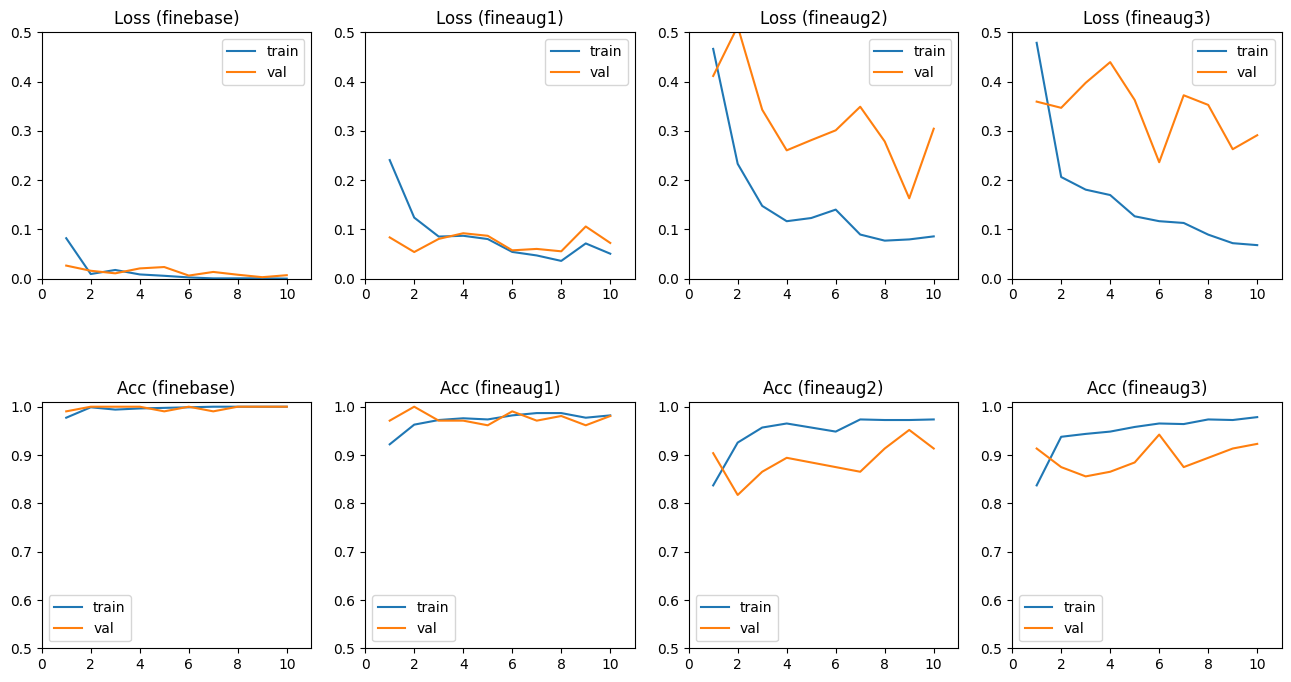

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(16,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plt_lss("Loss (finebase)", fine_baseinfo, axs[0],)
plt_lss("Loss (fineaug1)", info_aug1fine, axs[1])
plt_lss("Loss (fineaug2)", info_aug2fine, axs[2])
plt_lss("Loss (fineaug3)", info_aug3fine, axs[3])
plt_acc("Acc (finebase)", fine_baseinfo, axs[4])
plt_acc("Acc (fineaug1)", info_aug1fine, axs[5])
plt_acc("Acc (fineaug2)", info_aug2fine, axs[6])
plt_acc("Acc (fineaug3)", info_aug3fine, axs[7])

In [14]:
# Accuracies
truel1, predl1 = labels_and_predictions(dataloader_test, model_aug1fine, device)
truel2, predl2 = labels_and_predictions(dataloader_test, model_aug2fine, device)
truel3, predl3 = labels_and_predictions(dataloader_test, model_aug3fine, device)

In [15]:
# Feeder accuracies
truel1feed, predl1feed = labels_and_predictions(dataloader_feeder, model_aug1fine, device)
truel2feed, predl2feed = labels_and_predictions(dataloader_feeder, model_aug2fine, device)
truel3feed, predl3feed = labels_and_predictions(dataloader_feeder, model_aug3fine, device)

In [20]:
print("\n-- Test accuracies:")
print("No finetuning: {:.4f}".format(baseinfo["test_acc"])) 
print("Finetuning regular: {:.4f}".format(fine_baseinfo["test_acc"]))
print("Finetuning on aug1: {:.4f}".format(accuracy(truel1, predl1))) 
print("Finetuning on aug2: {:.4f}".format(accuracy(truel2, predl2))) 
print("Finetuning on aug3: {:.4f}".format(accuracy(truel3, predl3)))
print("\n-- Feeder accuracies:")
print("No finetuning: {:.4f}".format(30.4463)) # stole it from afile where i had the patience to gen its predls for the feeder data zz
print("Finetuning regular: {:.4f}".format(fine_baseinfo["feed_acc"]))
print("Finetuning on aug1: {:.4f}".format(accuracy(truel1feed, predl1feed))) 
print("Finetuning on aug2: {:.4f}".format(accuracy(truel2feed, predl2feed))) 
print("Finetuning on aug3: {:.4f}".format(accuracy(truel3feed, predl3feed)))


-- Test accuracies:
No finetuning: 97.1429
Finetuning regular: 99.0476
Finetuning on aug1: 97.1429
Finetuning on aug2: 85.7143
Finetuning on aug3: 89.5238

-- Feeder accuracies:
No finetuning: 30.4463
Finetuning regular: 58.4256
Finetuning on aug1: 49.9702
Finetuning on aug2: 41.7468
Finetuning on aug3: 50.3283


In [21]:
save_function("fineonly_aug1.tar", model_aug1fine, info_aug1fine, extra_info={"test_acc": accuracy(truel1, predl1), "feeder_acc":accuracy(truel1feed, predl1feed), "finetuning":"layer 4, lr=0.0005, 10 epochs, aug1 data", "optimizer": "Adam with lr=0.0005"})
save_function("fineonly_aug2.tar", model_aug2fine, info_aug2fine, extra_info={"test_acc": accuracy(truel2, predl2), "feeder_acc":accuracy(truel2feed, predl2feed), "finetuning":"layer 4, lr=0.0005, 10 epochs, aug2 data", "optimizer": "Adam with lr=0.0005"})
save_function("fineonly_aug3.tar", model_aug3fine, info_aug3fine, extra_info={"test_acc": accuracy(truel3, predl3), "feeder_acc":accuracy(truel3feed, predl3feed), "finetuning":"layer 4, lr=0.0005, 10 epochs, aug3 data", "optimizer": "Adam with lr=0.0005"})

# Training *and* finetuning on augmented data

In [11]:
# load in the basemodel (trained while frozen)
model_aug1full, info_aug1full = load_function("aug1_50_lr0005.tar")
unfreeze_layer4(model_aug1full)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1full.parameters()), lr=lr)

# begin finetuning
model_aug1full, info_aug1full = train_model(model_aug1full, optimizer, num_epoch=epochs, train=dataloader_train_aug1, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.2240 Acc: 0.9281
Val Loss: 0.0820 Acc: 0.9808
Epoch time 1m 46s
----------

Epoch 2/10
----------
Train Loss: 0.1046 Acc: 0.9713
Val Loss: 0.0639 Acc: 0.9712
Epoch time 1m 29s
----------

Epoch 3/10
----------
Train Loss: 0.1141 Acc: 0.9677
Val Loss: 0.0390 Acc: 0.9808
Epoch time 1m 22s
----------

Epoch 4/10
----------
Train Loss: 0.0678 Acc: 0.9820
Val Loss: 0.0737 Acc: 0.9712
Epoch time 1m 18s
----------

Epoch 5/10
----------
Train Loss: 0.0757 Acc: 0.9725
Val Loss: 0.0524 Acc: 0.9712
Epoch time 1m 19s
----------

Epoch 6/10
----------
Train Loss: 0.0354 Acc: 0.9928
Val Loss: 0.0274 Acc: 1.0000
Epoch time 2m 14s
----------

Epoch 7/10
----------
Train Loss: 0.0750 Acc: 0.9784
Val Loss: 0.0376 Acc: 0.9904
Epoch time 1m 20s
----------

Epoch 8/10
----------
Train Loss: 0.0574 Acc: 0.9820
Val Loss: 0.0328 Acc: 0.9808
Epoch time 1m 18s
----------

Epoch 9/10
----------
Train Loss: 0.0725 Acc: 0.9784
Val Loss: 0.0580 Acc: 0.9712
Epoch time 0m 46s
----

In [5]:
# load in the basemodel (trained while frozen)
model_aug2full, info_aug2full = load_function("aug2_50_lr00005.tar")
unfreeze_layer4(model_aug2full)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug2full.parameters()), lr=lr)

# begin finetuning
model_aug2full, info_aug2full = train_model(model_aug2full, optimizer, num_epoch=epochs, train=dataloader_train_aug2, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.3200 Acc: 0.9006
Val Loss: 0.5291 Acc: 0.8173
Epoch time 1m 9s
----------

Epoch 2/10
----------
Train Loss: 0.2084 Acc: 0.9234
Val Loss: 0.5579 Acc: 0.7981
Epoch time 0m 44s
----------

Epoch 3/10
----------
Train Loss: 0.1613 Acc: 0.9581
Val Loss: 0.4083 Acc: 0.8750
Epoch time 0m 43s
----------

Epoch 4/10
----------
Train Loss: 0.1167 Acc: 0.9605
Val Loss: 0.3941 Acc: 0.8654
Epoch time 0m 44s
----------

Epoch 5/10
----------
Train Loss: 0.0786 Acc: 0.9713
Val Loss: 0.3735 Acc: 0.8750
Epoch time 0m 46s
----------

Epoch 6/10
----------
Train Loss: 0.0743 Acc: 0.9737
Val Loss: 0.4740 Acc: 0.8365
Epoch time 0m 45s
----------

Epoch 7/10
----------
Train Loss: 0.1330 Acc: 0.9617
Val Loss: 0.4028 Acc: 0.8269
Epoch time 0m 46s
----------

Epoch 8/10
----------
Train Loss: 0.0897 Acc: 0.9749
Val Loss: 0.4653 Acc: 0.8654
Epoch time 0m 44s
----------

Epoch 9/10
----------
Train Loss: 0.1120 Acc: 0.9689
Val Loss: 0.3715 Acc: 0.8654
Epoch time 0m 45s
-----

In [6]:
# load in the basemodel (trained while frozen)
model_aug3full, info_aug3full = load_function("aug3_50_lr00005.tar")
unfreeze_layer4(model_aug3full)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug3full.parameters()), lr=lr)

# begin finetuning
model_aug3full, info_aug3full = train_model(model_aug3full, optimizer, num_epoch=epochs, train=dataloader_train_aug3, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.3264 Acc: 0.8958
Val Loss: 0.5622 Acc: 0.7788
Epoch time 0m 42s
----------

Epoch 2/10
----------
Train Loss: 0.1953 Acc: 0.9353
Val Loss: 0.5448 Acc: 0.8173
Epoch time 0m 42s
----------

Epoch 3/10
----------
Train Loss: 0.1550 Acc: 0.9497
Val Loss: 0.3919 Acc: 0.8750
Epoch time 0m 42s
----------

Epoch 4/10
----------
Train Loss: 0.1414 Acc: 0.9569
Val Loss: 0.3589 Acc: 0.8846
Epoch time 0m 46s
----------

Epoch 5/10
----------
Train Loss: 0.0959 Acc: 0.9725
Val Loss: 0.3463 Acc: 0.9038
Epoch time 0m 44s
----------

Epoch 6/10
----------
Train Loss: 0.0774 Acc: 0.9749
Val Loss: 0.2970 Acc: 0.9135
Epoch time 0m 44s
----------

Epoch 7/10
----------
Train Loss: 0.0921 Acc: 0.9737
Val Loss: 0.2751 Acc: 0.8942
Epoch time 0m 44s
----------

Epoch 8/10
----------
Train Loss: 0.0764 Acc: 0.9760
Val Loss: 0.3597 Acc: 0.8654
Epoch time 0m 46s
----------

Epoch 9/10
----------
Train Loss: 0.0649 Acc: 0.9808
Val Loss: 0.2965 Acc: 0.9038
Epoch time 0m 48s
----

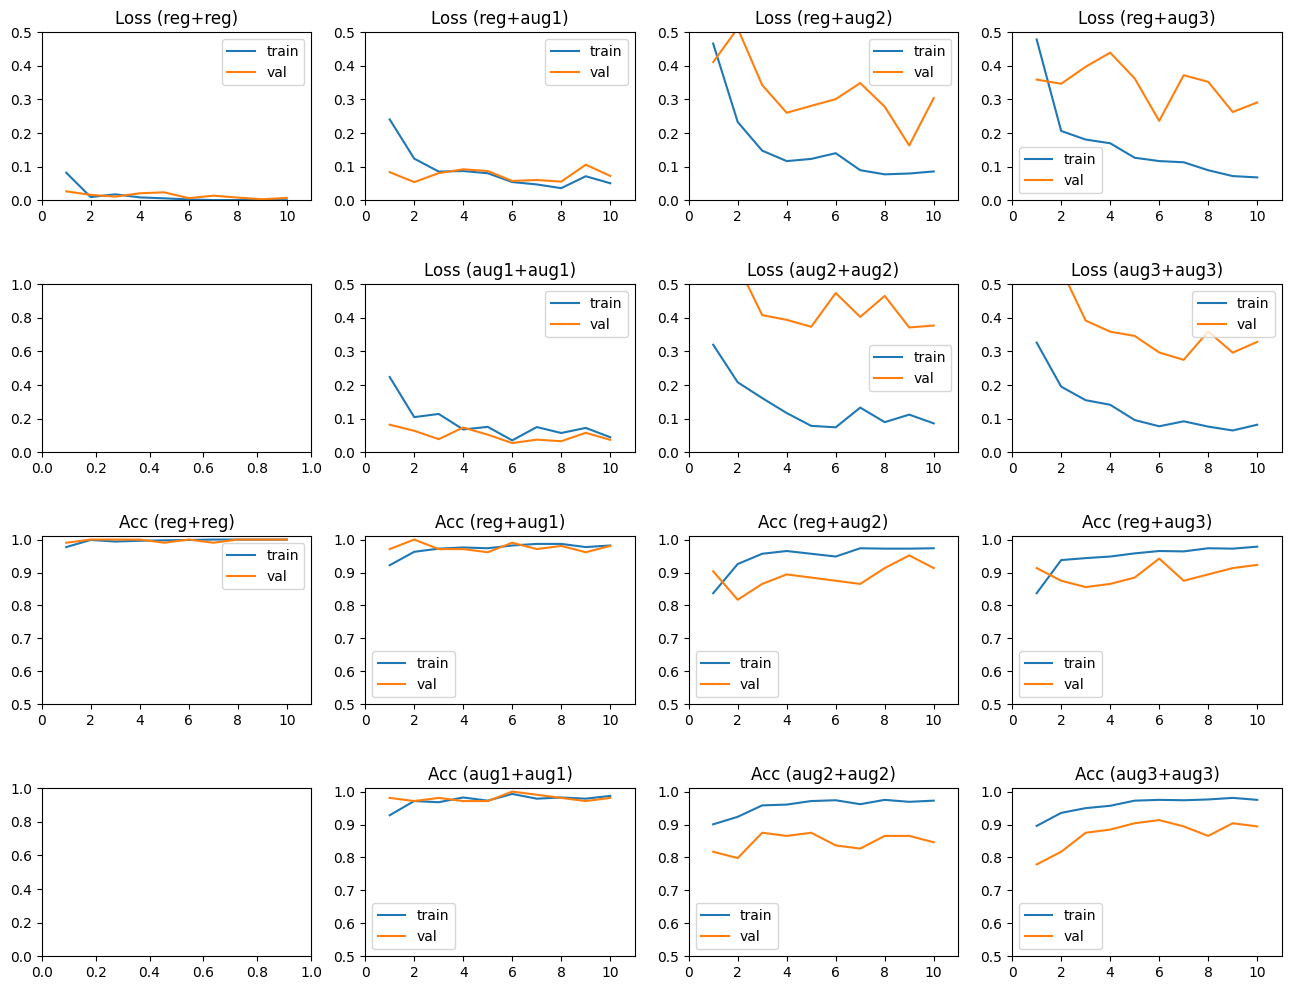

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plt_lss("Loss (reg+reg)", fine_baseinfo, axs[0],)
plt_lss("Loss (reg+aug1)", info_aug1fine, axs[1])
plt_lss("Loss (reg+aug2)", info_aug2fine, axs[2])
plt_lss("Loss (reg+aug3)", info_aug3fine, axs[3])
plt_lss("Loss (aug1+aug1)", info_aug1full, axs[5])
plt_lss("Loss (aug2+aug2)", info_aug2full, axs[6])
plt_lss("Loss (aug3+aug3)", info_aug3full, axs[7])
plt_acc("Acc (reg+reg)", fine_baseinfo, axs[8])
plt_acc("Acc (reg+aug1)", info_aug1fine, axs[9])
plt_acc("Acc (reg+aug2)", info_aug2fine, axs[10])
plt_acc("Acc (reg+aug3)", info_aug3fine, axs[11])
plt_acc("Acc (aug1+aug1)", info_aug1full, axs[13])
plt_acc("Acc (aug2+aug2)", info_aug2full, axs[14])
plt_acc("Acc (aug3+aug3)", info_aug3full, axs[15])

In [15]:
# Accuracies
truel1full, predl1full = labels_and_predictions(dataloader_test, model_aug1full, device)
truel2full, predl2full = labels_and_predictions(dataloader_test, model_aug2full, device)
truel3full, predl3full = labels_and_predictions(dataloader_test, model_aug3full, device)

In [17]:
# Feeder accuracies
truel1feedfull, predl1feedfull = labels_and_predictions(dataloader_feeder, model_aug1full, device)
truel2feedfull, predl2feedfull = labels_and_predictions(dataloader_feeder, model_aug2full, device)
truel3feedfull, predl3feedfull = labels_and_predictions(dataloader_feeder, model_aug3full, device)

In [ ]:
# load the models where we used aug data for finetuning only
model_aug1fine, info_aug1fine = load_function("fineonly_aug1.tar")
model_aug2fine, info_aug2fine = load_function("fineonly_aug2.tar")
model_aug3fine, info_aug3fine = load_function("fineonly_aug3.tar")

In [18]:
# loading in the models with aug data but no finetuning
model_aug1, info_aug1 = load_function("aug1_50_lr0005.tar")
model_aug2, info_aug2 = load_function("aug2_50_lr00005.tar")
model_aug3, info_aug3 = load_function("aug3_50_lr00005.tar")

In [25]:
print("----------- Accuracies -----------")
print("tran + fine:    testacc // feedacc\n")
print("----------------------------------")
print("reg  + ----:    {:.4f} // {:.4f}".format(baseinfo["test_acc"], 30.4463)) # stole it from afile where i had the patience to gen its predls for the feeder data zz
print("aug1 + ----:    {:.4f} // {:.4f}".format(info_aug1["test_acc"], info_aug1["feeder_acc"])) 
print("aug2 + ----:    {:.4f} // {:.4f}".format(info_aug2["test_acc"], info_aug2["feeder_acc"])) 
print("aug3 + ----:    {:.4f} // {:.4f}".format(info_aug3["test_acc"], info_aug3["feeder_acc"])) 
print()
print("reg  +  reg:    {:.4f} // {:.4f}".format(fine_baseinfo["test_acc"], fine_baseinfo["feed_acc"]))
print()
print("reg  + aug1:    {:.4f} // {:.4f}".format(info_aug1fine["test_acc"], info_aug1fine["feeder_acc"])) 
print("reg  + aug2:    {:.4f} // {:.4f}".format(info_aug2fine["test_acc"], info_aug2fine["feeder_acc"])) 
print("reg  + aug3:    {:.4f} // {:.4f}".format(info_aug3fine["test_acc"], info_aug3fine["feeder_acc"]))
print()
print("aug1 + aug1:    {:.4f} // {:.4f}".format(accuracy(truel1full, predl1full), accuracy(truel1feedfull, predl1feedfull))) 
print("aug2 + aug2:    {:.4f} // {:.4f}".format(accuracy(truel2full, predl2full), accuracy(truel2feedfull, predl2feedfull))) 
print("aug3 + aug3:    {:.4f} // {:.4f}".format(accuracy(truel3full, predl3full), accuracy(truel3feedfull, predl3feedfull)))

----------- Accuracies -----------
tran + fine:    testacc // feedacc

----------------------------------
reg  + ----:    97.1429 // 30.4463
aug1 + ----:    94.2857 // 31.0631
aug2 + ----:    71.4286 // 30.0749
aug3 + ----:    71.4286 // 29.5378

reg  +  reg:    99.0476 // 58.4256

reg  + aug1:    97.1429 // 49.9702
reg  + aug2:    85.7143 // 41.7468
reg  + aug3:    89.5238 // 50.3283

aug1 + aug1:    97.1429 // 54.2874
aug2 + aug2:    81.9048 // 38.3513
aug3 + aug3:    89.5238 // 40.0292


In [35]:
print("----------- Accuracies -----------")
print("tran + fine:    testacc // feedacc")
print("----------------------------------\n")

print("reg  + ----:    {:.4f} // {:.4f}".format(baseinfo["test_acc"], 30.4463)) # stole it from afile where i had the patience to gen its predls for the feeder data zz
print("aug1 + ----:    {:.4f} // {:.4f}".format(info_aug1["test_acc"], info_aug1["feeder_acc"])) 
print("aug2 + ----:    {:.4f} // {:.4f}".format(info_aug2["test_acc"], info_aug2["feeder_acc"])) 
print("aug3 + ----:    {:.4f} // {:.4f}".format(info_aug3["test_acc"], info_aug3["feeder_acc"])) 
print()

print("----------------------------------\n")
print("reg  +  reg:    {:.4f} // {:.4f}".format(fine_baseinfo["test_acc"], fine_baseinfo["feed_acc"]))
print("reg  + aug1:    {:.4f} // {:.4f}".format(info_aug1fine["test_acc"], info_aug1fine["feeder_acc"])) 
print("reg  + aug2:    {:.4f} // {:.4f}".format(info_aug2fine["test_acc"], info_aug2fine["feeder_acc"])) 
print("reg  + aug3:    {:.4f} // {:.4f}".format(info_aug3fine["test_acc"], info_aug3fine["feeder_acc"]))
print()


print("----------------------------------\n")
print("aug1 + ----:    {:.4f} // {:.4f}".format(info_aug1["test_acc"], info_aug1["feeder_acc"])) 
print("reg  + aug1:    {:.4f} // {:.4f}".format(info_aug1fine["test_acc"], info_aug1fine["feeder_acc"])) 
print("aug1 + aug1:    {:.4f} // {:.4f}".format(accuracy(truel1full, predl1full), accuracy(truel1feedfull, predl1feedfull))) 
print()

print("aug2 + ----:    {:.4f} // {:.4f}".format(info_aug2["test_acc"], info_aug2["feeder_acc"])) 
print("reg  + aug2:    {:.4f} // {:.4f}".format(info_aug2fine["test_acc"], info_aug2fine["feeder_acc"])) 
print("aug2 + aug2:    {:.4f} // {:.4f}".format(accuracy(truel2full, predl2full), accuracy(truel2feedfull, predl2feedfull))) 
print()

print("aug3 + ----:    {:.4f} // {:.4f}".format(info_aug3["test_acc"], info_aug3["feeder_acc"])) 
print("reg  + aug3:    {:.4f} // {:.4f}".format(info_aug3fine["test_acc"], info_aug3fine["feeder_acc"]))
print("aug3 + aug3:    {:.4f} // {:.4f}".format(accuracy(truel3full, predl3full), accuracy(truel3feedfull, predl3feedfull)))
print()


----------- Accuracies -----------
tran + fine:    testacc // feedacc
----------------------------------

reg  + ----:    97.1429 // 30.4463
aug1 + ----:    94.2857 // 31.0631
aug2 + ----:    71.4286 // 30.0749
aug3 + ----:    71.4286 // 29.5378

----------------------------------

reg  +  reg:    99.0476 // 58.4256
reg  + aug1:    97.1429 // 49.9702
reg  + aug2:    85.7143 // 41.7468
reg  + aug3:    89.5238 // 50.3283

----------------------------------

aug1 + ----:    94.2857 // 31.0631
reg  + aug1:    97.1429 // 49.9702
aug1 + aug1:    97.1429 // 54.2874

aug2 + ----:    71.4286 // 30.0749
reg  + aug2:    85.7143 // 41.7468
aug2 + aug2:    81.9048 // 38.3513

aug3 + ----:    71.4286 // 29.5378
reg  + aug3:    89.5238 // 50.3283
aug3 + aug3:    89.5238 // 40.0292



In [31]:
save_function("fine_aug1.tar", model_aug1fine, info_aug1fine, extra_info={"test_acc": accuracy(truel1full, predl1full), "feeder_acc":accuracy(truel1feedfull, predl1feedfull), "datasets": "training on aug1, finetuning on aug1","finetuning":"layer 4, lr=0.0005, 10 epochs, aug1 data", "optimizer": "Adam with lr=0.0005"})
save_function("fine_aug2.tar", model_aug2fine, info_aug2fine, extra_info={"test_acc": accuracy(truel2full, predl2full), "feeder_acc":accuracy(truel2feedfull, predl2feedfull), "datasets": "training on aug2, finetuning on aug2","finetuning":"layer 4, lr=0.0005, 10 epochs, aug2 data", "optimizer": "Adam with lr=0.0005"})
save_function("fine_aug3.tar", model_aug3fine, info_aug3fine, extra_info={"test_acc": accuracy(truel3full, predl3full), "feeder_acc":accuracy(truel3feedfull, predl3feedfull), "datasets": "training on aug3, finetuning on aug3","finetuning":"layer 4, lr=0.0005, 10 epochs, aug3 data", "optimizer": "Adam with lr=0.0005"})

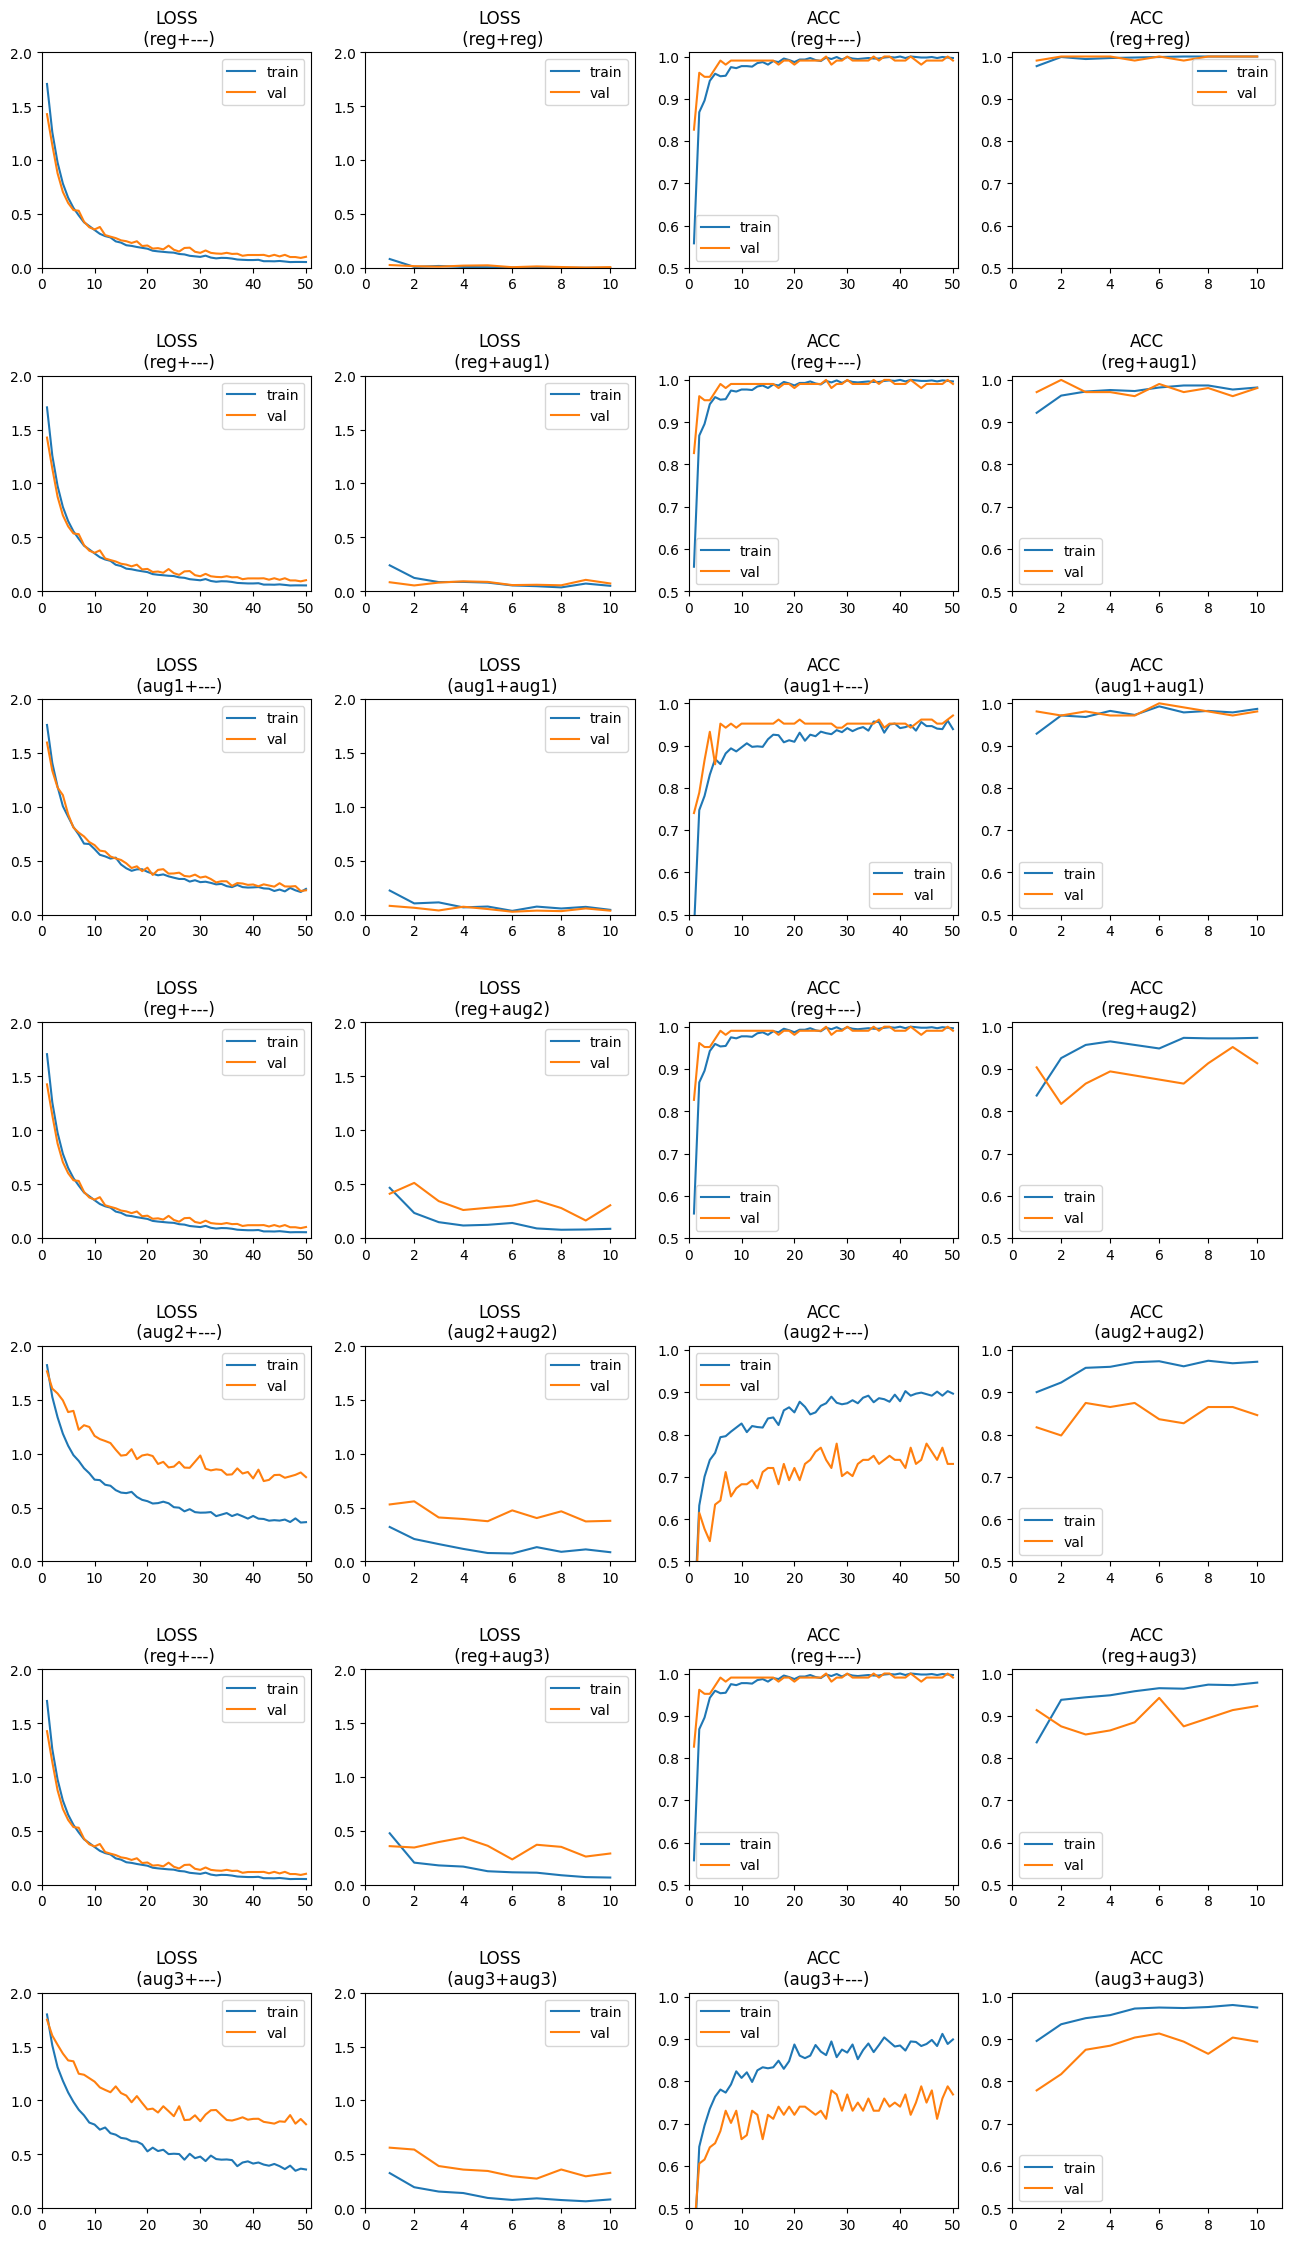

In [69]:
fig, axs = plt.subplots(7, 4, figsize=(16,28))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plt_lss("LOSS\n (reg+---)", baseinfo, axs[0], ylim_top=2, xlim_top=51)
plt_lss("LOSS\n (reg+reg)", fine_baseinfo, axs[1], ylim_top=2)
plt_acc("ACC\n (reg+---)", baseinfo, axs[2], xlim_top=51)
plt_acc("ACC\n (reg+reg)", fine_baseinfo, axs[3])

plt_lss("LOSS\n (reg+---)", baseinfo, axs[4], ylim_top=2, xlim_top=51)
plt_lss("LOSS\n (reg+aug1)", info_aug1fine, axs[5], ylim_top=2)
plt_acc("ACC\n (reg+---)", baseinfo, axs[6], xlim_top=51)
plt_acc("ACC\n (reg+aug1)", info_aug1fine, axs[7])

plt_lss("LOSS\n (aug1+---)", info_aug1, axs[8],ylim_top=2, xlim_top=51)
plt_lss("LOSS\n (aug1+aug1)", info_aug1full, axs[9], ylim_top=2)
plt_acc("ACC\n (aug1+---)", info_aug1, axs[10], xlim_top=51)
plt_acc("ACC\n (aug1+aug1)", info_aug1full, axs[11])

plt_lss("LOSS\n (reg+---)", baseinfo, axs[12], ylim_top=2, xlim_top=51)
plt_lss("LOSS\n (reg+aug2)", info_aug2fine, axs[13], ylim_top=2)
plt_acc("ACC\n (reg+---)", baseinfo, axs[14], xlim_top=51)
plt_acc("ACC\n (reg+aug2)", info_aug2fine, axs[15])

plt_lss("LOSS\n (aug2+---)", info_aug2, axs[16], ylim_top=2, xlim_top=51)
plt_lss("LOSS\n (aug2+aug2)", info_aug2full, axs[17], ylim_top=2)
plt_acc("ACC\n (aug2+---)", info_aug2, axs[18], xlim_top=51)
plt_acc("ACC\n (aug2+aug2)", info_aug2full, axs[19])

plt_lss("LOSS\n (reg+---)", baseinfo, axs[20], ylim_top=2,xlim_top=51)
plt_lss("LOSS\n (reg+aug3)", info_aug3fine, axs[21], ylim_top=2)
plt_acc("ACC\n (reg+---)", baseinfo, axs[22], xlim_top=51)
plt_acc("ACC\n (reg+aug3)", info_aug3fine, axs[23])

plt_lss("LOSS\n (aug3+---)", info_aug3, axs[24], ylim_top=2, xlim_top=51)
plt_lss("LOSS\n (aug3+aug3)", info_aug3full, axs[25], ylim_top=2)
plt_acc("ACC\n (aug3+---)", info_aug3, axs[26], xlim_top=51)
plt_acc("ACC\n (aug3+aug3)", info_aug3full, axs[27])


# Aug training again

Seems like maybe the aug trainings weren't quite done? The best one (aug1) only achieves a loss of 0.2 and the two others look like shit in general. So maybe let's just adjust aug1...

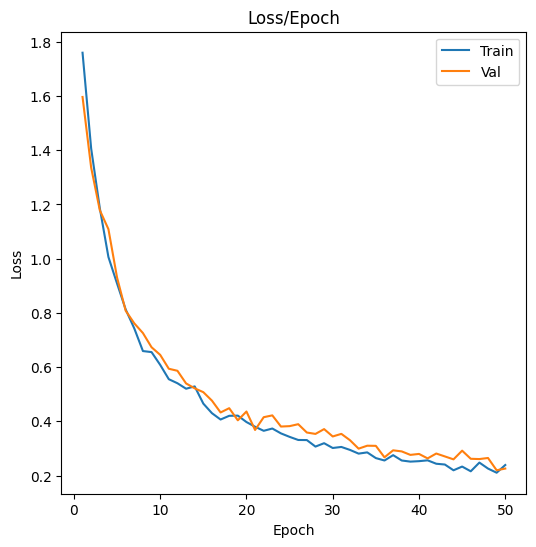

In [ ]:
plot_loss(info_aug1["train_loss"], info_aug1["val_loss"])

In [64]:
untrained_model_aug1 = load_and_prep_resnet50()
epochs = 50
lr = 0.001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, untrained_model_aug1.parameters()), lr=lr)

# begin training
model_aug1_adjust, info_aug1_adjust = train_model(untrained_model_aug1, optimizer, num_epoch=epochs, train=dataloader_train_aug1, validation=dataloader_validation)

Epoch 1/50
----------
Train Loss: 1.6396 Acc: 0.4335
Val Loss: 1.3686 Acc: 0.7404
Epoch time 0m 39s
----------

Epoch 2/50
----------
Train Loss: 1.1168 Acc: 0.7581
Val Loss: 1.0697 Acc: 0.7981
Epoch time 0m 39s
----------

Epoch 3/50
----------
Train Loss: 0.8904 Acc: 0.8096
Val Loss: 0.8849 Acc: 0.9327
Epoch time 0m 41s
----------

Epoch 4/50
----------
Train Loss: 0.7148 Acc: 0.8778
Val Loss: 0.7793 Acc: 0.9327
Epoch time 0m 42s
----------

Epoch 5/50
----------
Train Loss: 0.6253 Acc: 0.8623
Val Loss: 0.6224 Acc: 0.9327
Epoch time 0m 43s
----------

Epoch 6/50
----------
Train Loss: 0.5551 Acc: 0.8910
Val Loss: 0.6077 Acc: 0.9231
Epoch time 0m 40s
----------

Epoch 7/50
----------
Train Loss: 0.5229 Acc: 0.8910
Val Loss: 0.5421 Acc: 0.9423
Epoch time 0m 41s
----------

Epoch 8/50
----------
Train Loss: 0.4899 Acc: 0.8946
Val Loss: 0.4847 Acc: 0.9519
Epoch time 0m 40s
----------

Epoch 9/50
----------
Train Loss: 0.4353 Acc: 0.8970
Val Loss: 0.4480 Acc: 0.9519
Epoch time 0m 40s
----

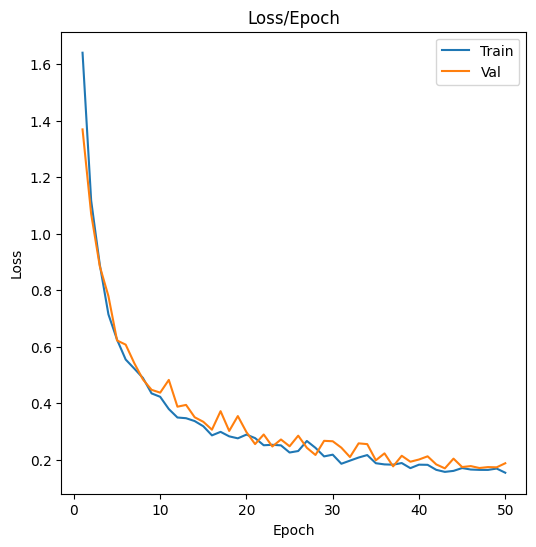

In [65]:
plot_loss(info_aug1_adjust["train_loss"], info_aug1_adjust["val_loss"])

In [66]:
# test accuracy
truel1_adj, predl1_adj = labels_and_predictions(dataloader_test, model_aug1_adjust, device)
accuracy(truel1_adj, predl1_adj)

95.23809523809523

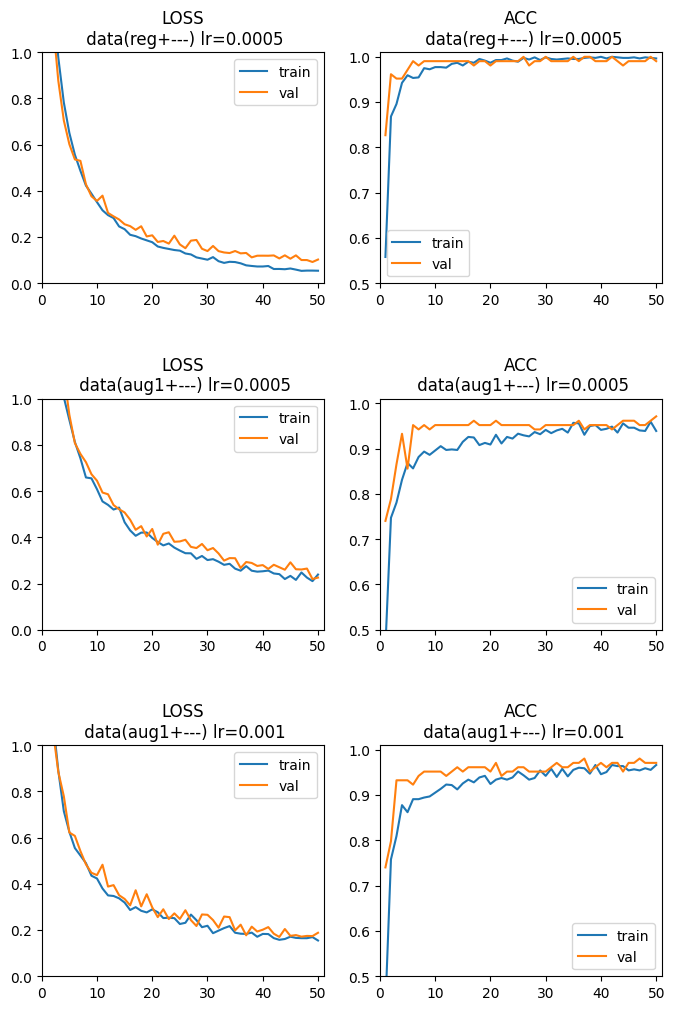

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(8,12))
plt.subplots_adjust(hspace=0.5)
axs = axs.ravel()

plt_lss("LOSS\n data(reg+---) lr=0.0005", baseinfo, axs[0],ylim_top=1, xlim_top=51)
plt_acc("ACC\n data(reg+---) lr=0.0005", baseinfo, axs[3], xlim_top=51)
plt_lss("LOSS\n data(aug1+---) lr=0.0005", info_aug1, axs[1],ylim_top=1, xlim_top=51)
plt_acc("ACC\n data(aug1+---) lr=0.0005", info_aug1, axs[4], xlim_top=51)
plt_lss("LOSS\n data(aug1+---) lr=0.001", info_aug1_adjust, axs[2],ylim_top=1, xlim_top=51)
plt_acc("ACC\n data(aug1+---) lr=0.001", info_aug1_adjust, axs[5], xlim_top=51)
#plt_lss("LOSS\n (aug1+aug1)", info_aug1full, axs[9], ylim_top=2)

In [ ]:
# feeder accuracy
truel1_adj_feed, predl1_adj_feed = labels_and_predictions(dataloader_feeder, model_aug1_adjust, device)

In [ ]:
save_function("aug1_50_lr0001.tar", model_aug1_adjust, info_aug1_adjust, {"test_acc": accuracy(truel1_adj, predl1_adj), "feeder_acc": accuracy(truel1_adj_feed, predl1_adj_feed), "optimizer": "Adam with lr=0.001", "epochs": 50})

In [ ]:
# now let's finetune it 
# load in the basemodel (trained while frozen)
model_aug1full_adjust, info_aug1full_adjust = load_function("aug1_50_lr0001.tar")
unfreeze_layer4(model_aug1full_adjust)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1full_adjust.parameters()), lr=lr)

# begin finetuning
model_aug1full_adjust, info_aug1full_adjust = train_model(model_aug3full_adjust, optimizer, num_epoch=epochs, train=dataloader_train_aug1, validation=dataloader_validation)